<a href="https://colab.research.google.com/github/valerymamontov/colab_notebooks/blob/main/Measures_of_the_central_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Меры центральной тенденции и меры изменчивости  

Закрепление теоритических знаний о моде, медиане и квартилях.  
Небольшой список с произвольным числом элементов.  
Рост небольшой группы человек (ед.изм. - см).

In [ ]:
# допустим есть список
my_list = [157,
           159,
           161,
           164,
           165,
           166,
           167,167,167,167,
           168,
           169,169,
           170,170,170,
           171,171,
           172,172,172,172,
           173,173,
           175,175,
           177,
           178,178,
           179,
           185]

In [ ]:
# две функции для нахождения моды
# в первой используется библиотека collections
# во второй используется словарь
# первая возвращает кортеж
# вторая возвращает список

from collections import Counter


def func_find_mode(my_list):
    mode = []
    c = Counter(my_list)
    for k, v in c.items():
        if v == max(c.values()):
            mode.append(k)
    if len(mode) == 1:
        return mode[0]
    else:
        return tuple(mode)


def func_find_mode2(my_list):
    mode = list()
    my_dict = dict()

    for i in my_list:
        if i not in my_dict:
            my_dict[i] = 1
        else:
            my_dict[i] = my_dict[i] + 1
    
    for k,v in my_dict.items():
        if v == max(my_dict.values()):
            mode.append(k)
    return mode

In [ ]:
# функция для вычисления медианы
# функция для вычисления дисперсии


def func_find_median(my_list):
    if len(my_list) % 2 == 0:
        a = my_list[int(len(my_list)/2)-1]
        b = my_list[int(len(my_list)/2)]
        median = (a + b) / 2
    else:
        c = int(len(my_list)//2)
        median = my_list[c]
    return median


def func_find_disp(my_list, type="total"):
    # my_list - набор значений
    # type: total/selection - генеральная совокупность/выборка
    
    n = len(my_list)
    if type == "selection":
        n = n - 1
    
    average = sum(my_list) / len(my_list)
    total = 0
    for i in my_list:
        total = total + ((i - average)**2)

    return total / n

In [ ]:
average = sum(my_list)/len(my_list)
mode = func_find_mode(my_list)
mode2 = func_find_mode2(my_list)
median = func_find_median(my_list)
disp = func_find_disp(my_list)
sd = func_find_disp(my_list) ** (1/2)


print(f"среднее арифм.:\t\t {average}")
print(f"мода:\t\t\t {mode}")
print(f"мода2:\t\t\t {mode2}")
print(f"медиана:\t\t {median}")
print(f"дисперсия:\t\t {disp}")
print(f"среднее квадр.откл.:\t {sd}")

среднее арифм.:		 170.29032258064515
мода:			 (167, 172)
мода2:			 [167, 172]
медиана:		 170
дисперсия:		 34.07700312174818
среднее квадр.откл.:	 5.837551123694608


##Квартили

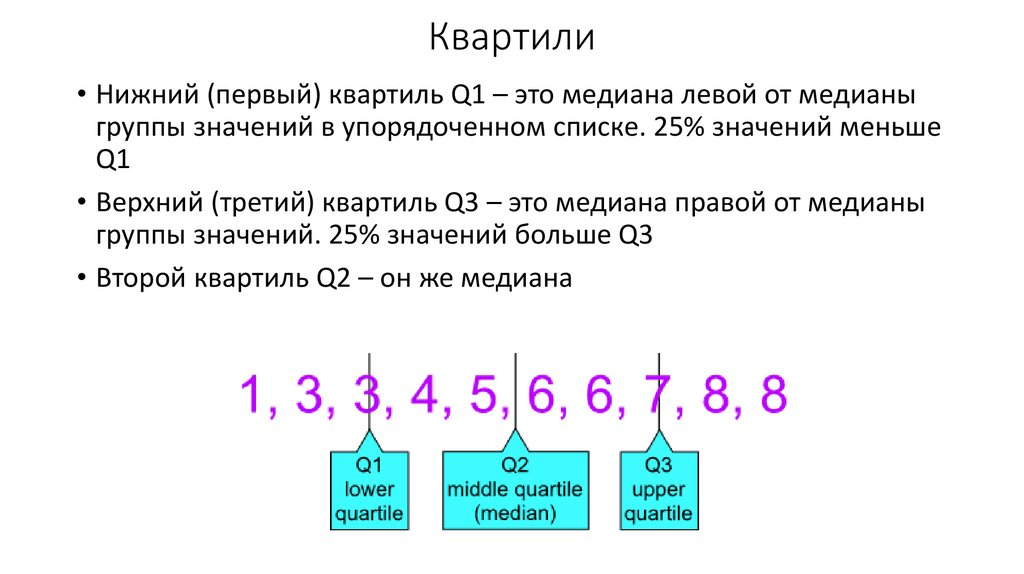

Квартили - значения, которые делят упорядоченную выборку на четыре примерно равные части.
В первую часть входчт первые 25% наблюдений, во вторую часть вз\ходят следующие 25% наблюдений и т.д.
Таким образом, первый квартиль отделяет первый 25% значений, второй квартиль - первые 50% значений,
третий квартиль - первые 75% значений, четвертый квартиль отделяет 100% значений (то есть все наблюдения в выборке).
Медиана - это второй квартиль.
Если выборка имеет нечётное число наблюдений, то медиана попадает в нижнюю и в верхнюю половины.  

 6 7 10 12 15 16 18 25 75  

нижняя половина  
 6 7 10 12 15  
верхняя половина  
 15 16 18 25 75

In [ ]:
# квартили


samplesCourse = [9, 10, 10, 11, 13, 15, 16, 19, 19, 21, 23, 28, 30, 33, 34, 36, 44, 45, 47, 60]

class sampleSet:
    def __init__(self, sampleList):
        self.sampleList = sampleList
        self.interList = list(sampleList) # interList is sampleList alias; alias used to maintain integrity of original sampleList

    def find_median(self):
        self.median = 0

        if len(self.sampleList) % 2 == 0:
            # find median for even-numbered sample list length
            self.medL = self.interList[int(len(self.interList)/2)-1]
            self.medU = self.interList[int(len(self.interList)/2)]
            self.median = (self.medL + self.medU)/2

        else:
            # find median for odd-numbered sample list length
            self.median = self.interList[int((len(self.interList)-1)/2)]
        return self.median

    def find_1stQuartile(self, median):
        self.lower50List = []
        self.Q1 = 0

        # break out lower 50 percentile from sampleList
        if len(self.interList) % 2 == 0:
            self.lower50List = self.interList[:int(len(self.interList)/2)]
        else:
            # drop median to make list ready to divide into 50 percentiles
            self.interList.pop(interList.index(self.median))
            self.lower50List = self.interList[:int(len(self.interList)/2)]

        # find 1st quartile (median of lower 50 percentiles)
        if len(self.lower50List) % 2 == 0:
            self.Q1L = self.lower50List[int(len(self.lower50List)/2)-1]
            self.Q1U = self.lower50List[int(len(self.lower50List)/2)]
            self.Q1 = (self.Q1L + self.Q1U)/2

        else:
            self.Q1 = self.lower50List[int((len(self.lower50List)-1)/2)]

        return self.Q1

    def find_3rdQuartile(self, median):
        self.upper50List = []
        self.Q3 = 0

        # break out upper 50 percentile from sampleList
        if len(self.sampleList) % 2 == 0:
            self.upper50List = self.interList[int(len(self.interList)/2):]
        else:
            self.interList.pop(interList.index(self.median))
            self.upper50List = self.interList[int(len(self.interList)/2):]

        # find 3rd quartile (median of upper 50 percentiles)
        if len(self.upper50List) % 2 == 0:
            self.Q3L = self.upper50List[int(len(self.upper50List)/2)-1]
            self.Q3U = self.upper50List[int(len(self.upper50List)/2)]
            self.Q3 = (self.Q3L + self.Q3U)/2

        else:
            self.Q3 = self.upper50List[int((len(self.upper50List)-1)/2)]

        return self.Q3

    def find_InterQuartileRange(self, Q1, Q3):
        self.IQR = self.Q3 - self.Q1
        return self.IQR

    def find_UpperFence(self, Q3, IQR):
        self.fence = self.Q3 + 1.5 * self.IQR
        return self.fence

samples = sampleSet(samplesCourse)
median = samples.find_median()
firstQ = samples.find_1stQuartile(median)
thirdQ = samples.find_3rdQuartile(median)
iqr = samples.find_InterQuartileRange(firstQ, thirdQ)
fence = samples.find_UpperFence(thirdQ, iqr)

print("Median is: ", median)
print("1st quartile is: ", firstQ)
print("3rd quartile is: ", thirdQ)
print("IQR is: ", iqr)
print("Upper fence is: ", fence)